# Taller 3

### Gustavo Alonso Gomez Morales

In [2]:
import sys
import os

notebook_dir = os.path.abspath('.')
parent_dir = os.path.dirname(notebook_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from util import *

import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image

## Punto 1: Transformaciones binarias

En este punto, deberá de encontrar la forma de pasar la imagen original a la imagen resultado utilizando operaciones binarias. Muy probablemente es necesario de que se requiera otra imagen, tal que se realice una operación con la imagen original y la imagen creada por usted. 

### Imagen original

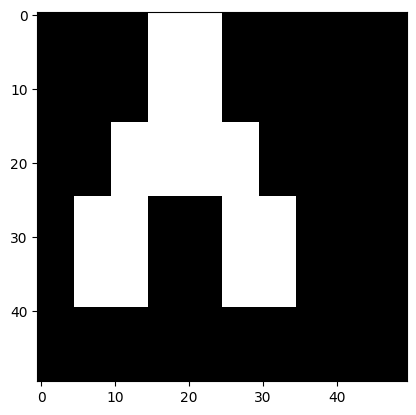

In [3]:
plt.imshow(cv2.imread('res/item1/Original.png', cv2.IMREAD_GRAYSCALE), cmap='gray')    

### Imagen resultado

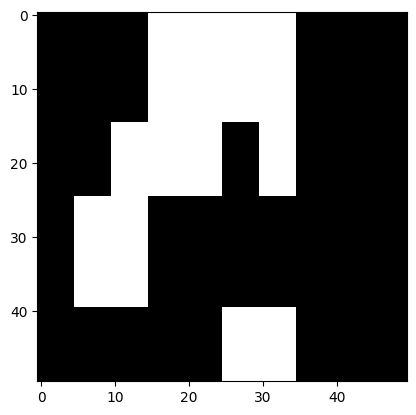

In [4]:
plt.imshow(cv2.imread('res/item1/Resultado.png', cv2.IMREAD_GRAYSCALE), cmap='gray')    

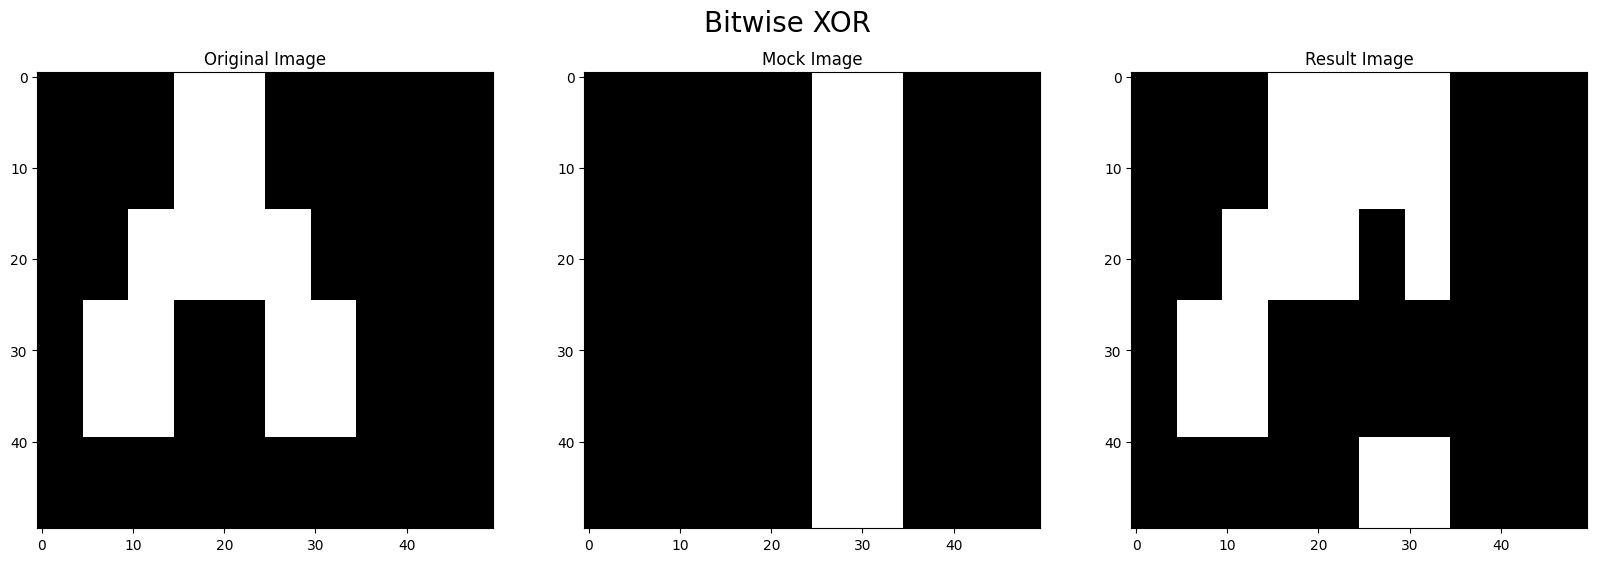

In [5]:
image = cv2.imread('res/item1/Original.png', cv2.IMREAD_GRAYSCALE)
size_image = image.shape

image_mock = np.zeros(size_image, dtype=np.uint8)
image_mock[0:50, 25:35] = 255

image_result = cv2.bitwise_xor(image, image_mock)

subplot_images(
    'Bitwise XOR' ,
    [image, image_mock, image_result], 
    ['Original Image', 'Mock Image', 'Result Image'], 
    (20, 6)
    )


## Punto 2: Función gamma

¿Recuerdan el punto de la luminosidad? Pues ahora sí lo harán como se realiza convencionalmente, que es utilizando una función gamma. Utilice una función gamma tal que se disminuya la iluminación de la imagen. El resultado esperado son 4 imagenes: la imagen original y 3 imagenes con la aplicación de la función gamma.

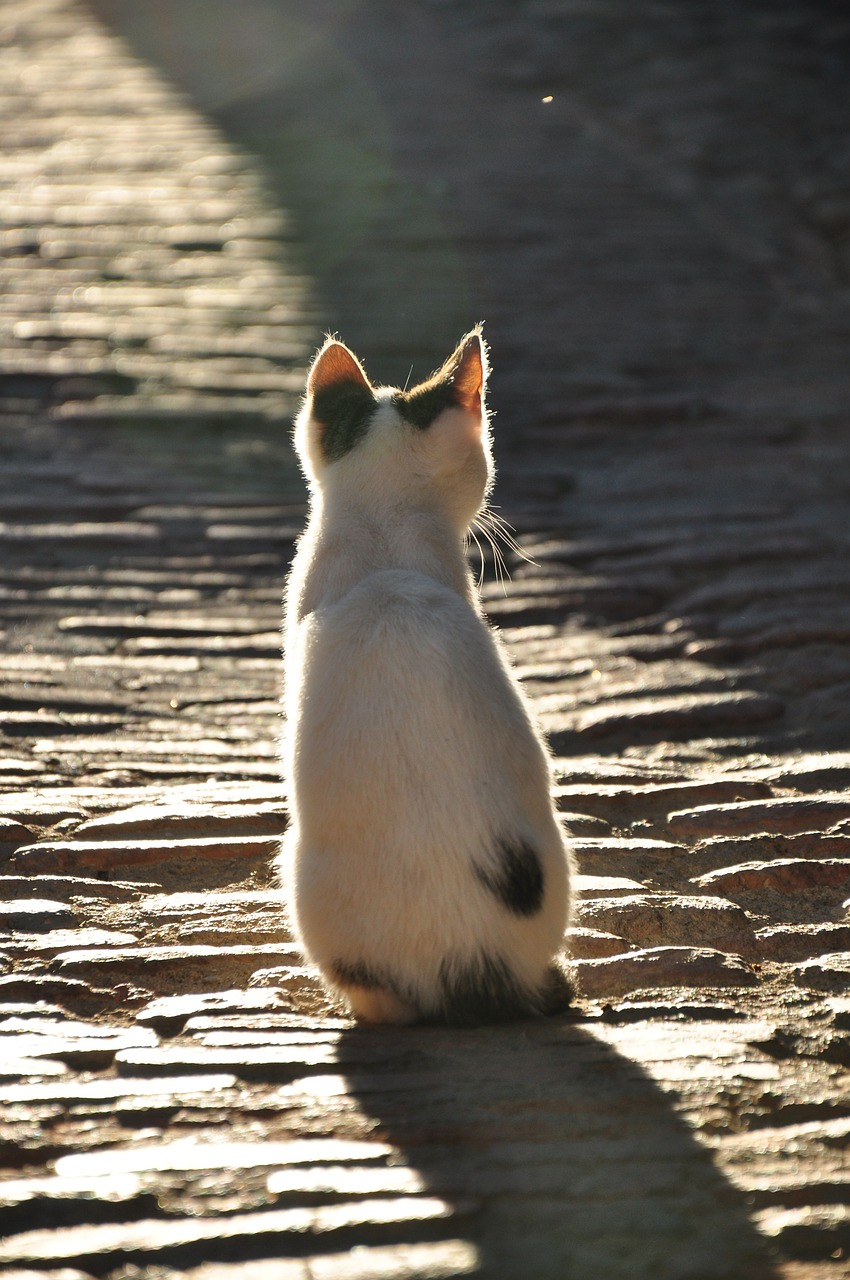

In [6]:
Image("res/item2/miau.jpg")

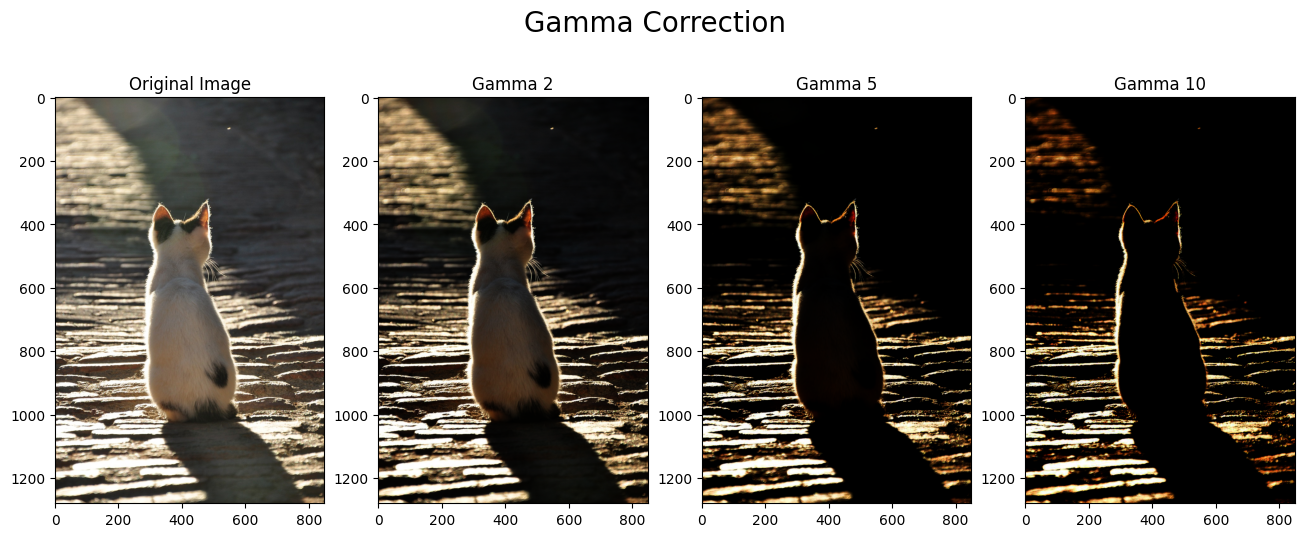

In [7]:

original_image = image_read('res/item2/miau.jpg')

params = {
    'img1': {'a': 1, 'gamma': 2},
    'img2': {'a': 1, 'gamma': 5},
    'img3': {'a': 1, 'gamma': 10},
    }

image1 = apply_transformation_on_rgb(original_image, gamma_correction, [params['img1']['a'], params['img1']['gamma']])
image2 = apply_transformation_on_rgb(original_image, gamma_correction, [params['img2']['a'], params['img2']['gamma']])
image3 = apply_transformation_on_rgb(original_image, gamma_correction, [params['img3']['a'], params['img3']['gamma']])

subplot_images("Gamma Correction", [original_image, image1, image2, image3], ['Original Image','Gamma 2', 'Gamma 5', 'Gamma 10'], (16, 6))

## Punto 3: Ecualización

Ya la normalización la ejecutaron en el examen, es momento de pasar a la ecualización. Deberá de realizar una ecualización uniforme sobre la mandala (es opcional si quiere utilizar otro tipo de distribución). El resultado esperado es:
<br>
<ul>
    <li>La imagen original con su histograma</li>
    <li>La imagen modificada con su histograma</li>
</ul>

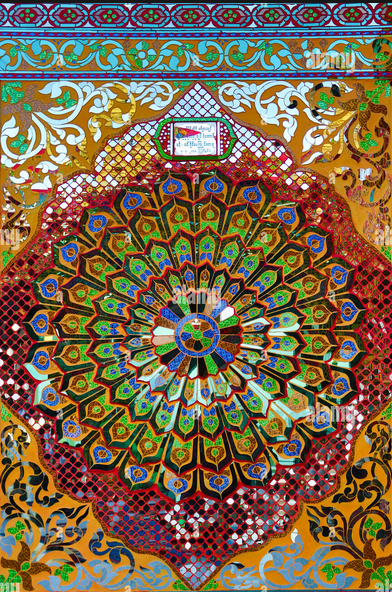

In [8]:
Image("res/item3/mandala.png")

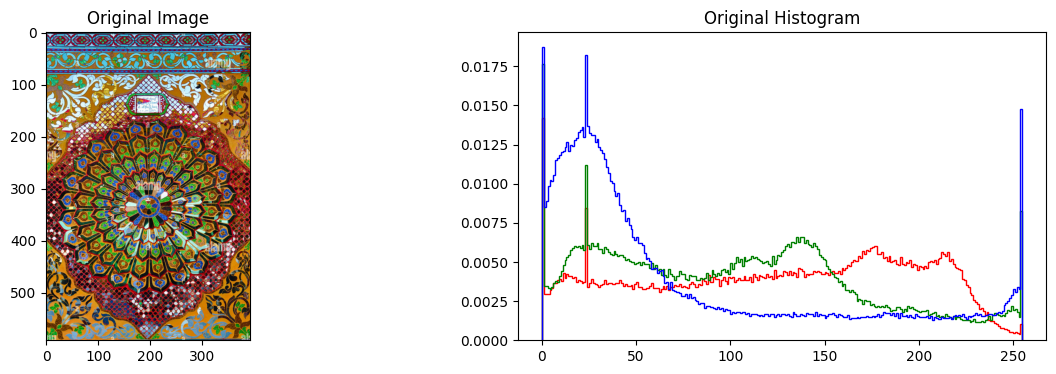

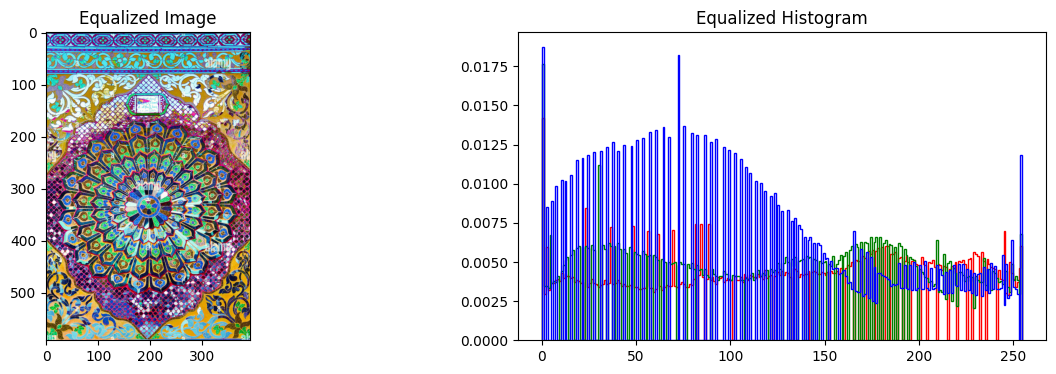

In [9]:
image = image_read('res/item3/mandala.png')
plot_image_and_histogram(image, image_title="Original Image", hist_title='Original Histogram')

image_result = apply_transformation_on_rgb(image, cv2.equalizeHist, [])
plot_image_and_histogram(image_result, image_title="Equalized Image", hist_title='Equalized Histogram')


## Punto 4: Utilizando otras funciones no lineales

Debe de realizar la siguiente función:
<br>
$
 f(g) = \left(0.5 \cdot \log\left(1 + \frac{g}{255}\right) + 0.1 \cdot \left(\log\left(1 + \frac{g}{255}\right)\right)^2\right) \cdot 255 
$
<br>
El resultado esperado es:
<br>
<ul>
    <li>La imagen original con su histograma</li>
    <li>La imagen modificada con su histograma</li>
</ul>

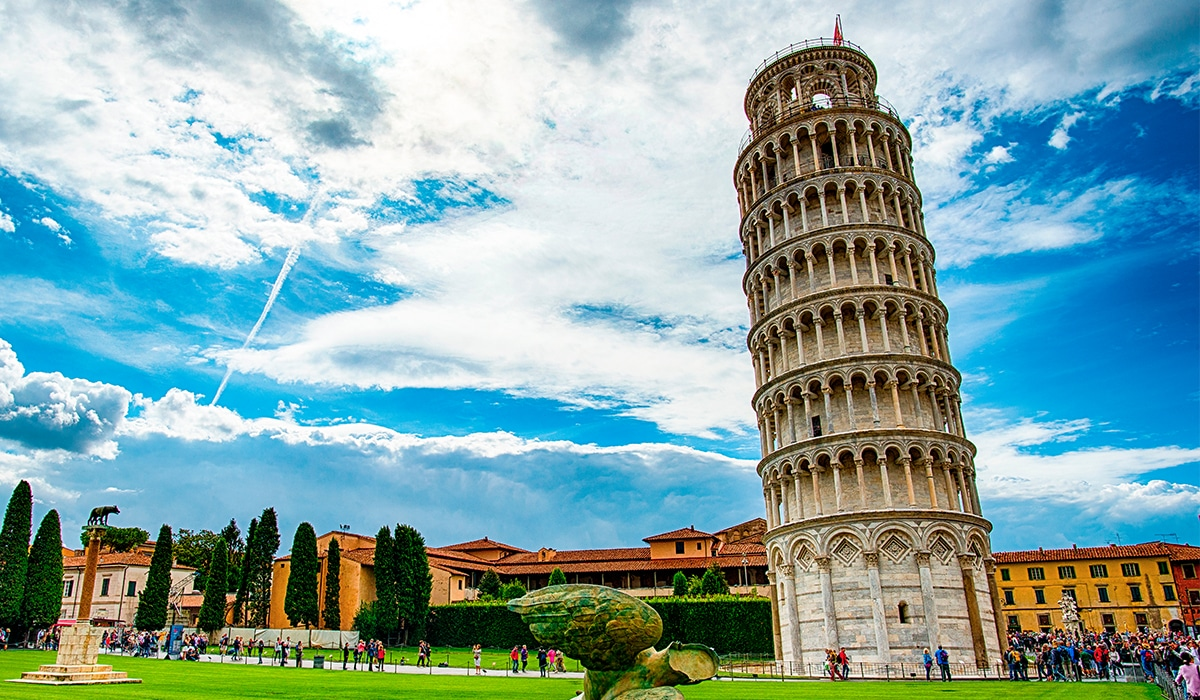

In [10]:
Image("res/item4/pisa.jpg")

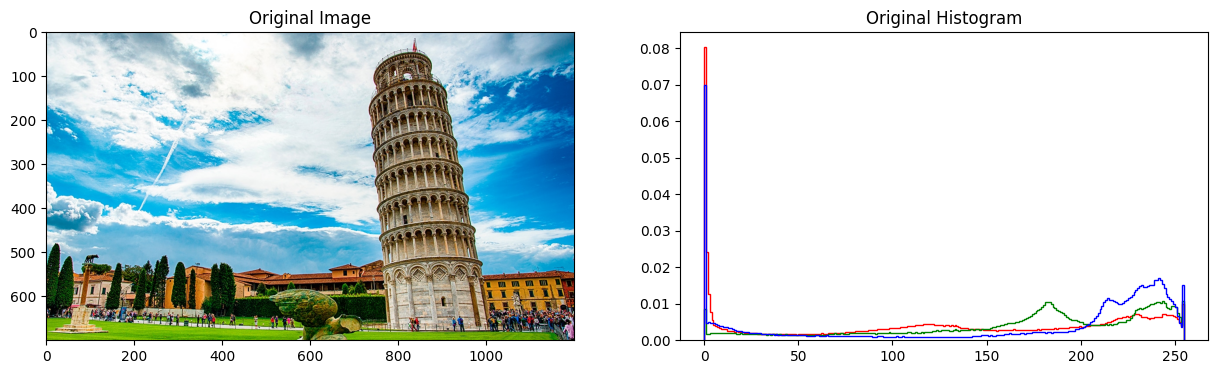

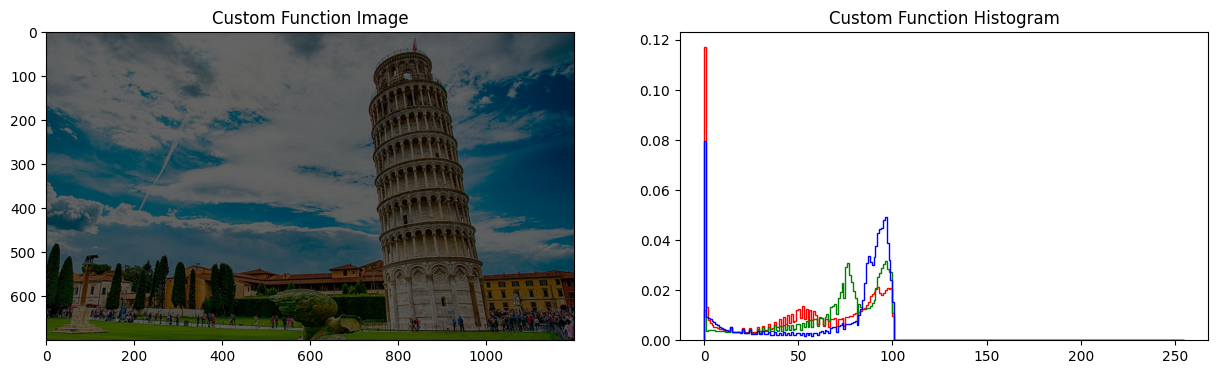

In [11]:
def custom_function(imagen: np.ndarray) -> np.ndarray:
    normalized_image = imagen / 255.0
    image_result = (((0.5 * np.log(1 + normalized_image)) + (0.1 * np.log(1 + normalized_image)**2)) * 255).astype(np.uint8)
    return image_result

image = image_read('res/item4/pisa.jpg')
image_result = apply_transformation_on_rgb(image, custom_function, [])

plot_image_and_histogram(image, image_title="Original Image", hist_title='Original Histogram')
plot_image_and_histogram(image_result, image_title="Custom Function Image", hist_title='Custom Function Histogram')